In [1]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle

In [2]:
plt.style.use("ggplot")

In [3]:
df = new_wrangle.acquire_data()

In [4]:
df = new_wrangle.wrangle_walmart()

/Users/albertopuentes/Desktop/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning:weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [5]:
df.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that attributes ['month', 'year', 'weekday'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['weekday'] = pd.to_datetime(df['weekday'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If weekday is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'weekday':'quantitative'})
/opt/home

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df[df.store_id ==3]

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that attributes ['month', 'year', 'weekday'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['weekday'] = pd.to_datetime(df['weekday'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If weekday is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'weekday':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
#train test split
X_train, y_train, X_test, y_test = new_wrangle.train_test(df,'weekly_sales')

X_train -> (5445, 20)
X_test -> (990, 20)


In [8]:
X_train.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that attributes ['month', 'year', 'weekday'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['weekday'] = pd.to_datetime(df['weekday'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If weekday is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'weekday':'quantitative'})
/opt/home

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Visualizing Target Versus Features

Text(0.5, 1.0, 'Average Temperature by Month')

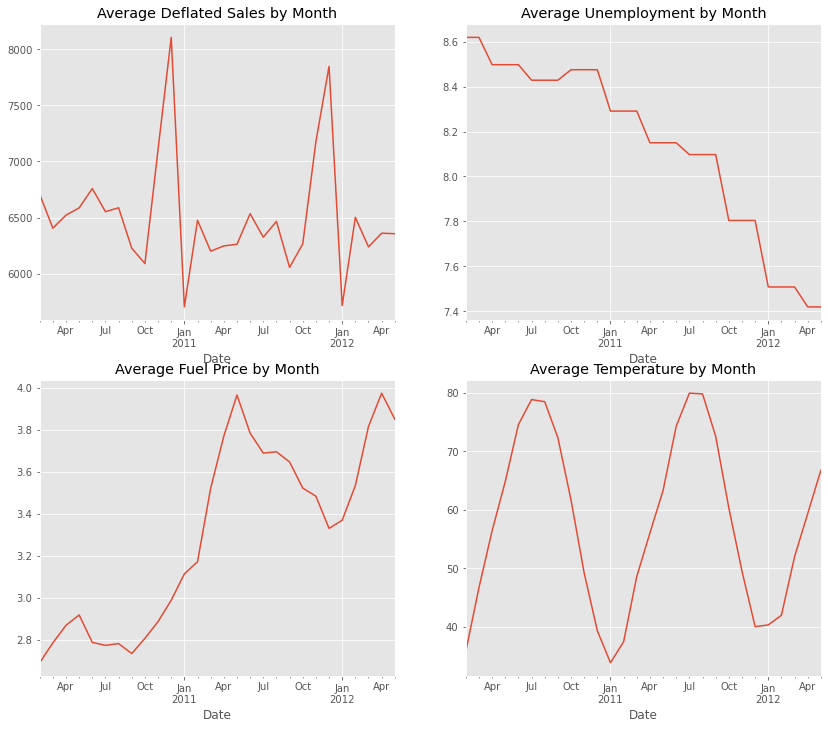

In [9]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Deflated Sales by Month')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Unemployment by Month')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Fuel Price by Month')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Temperature by Month')

### Visualizing Target and Feature Delta

Text(0.5, 1.0, 'Average Monthly YoY change - Temperature ')

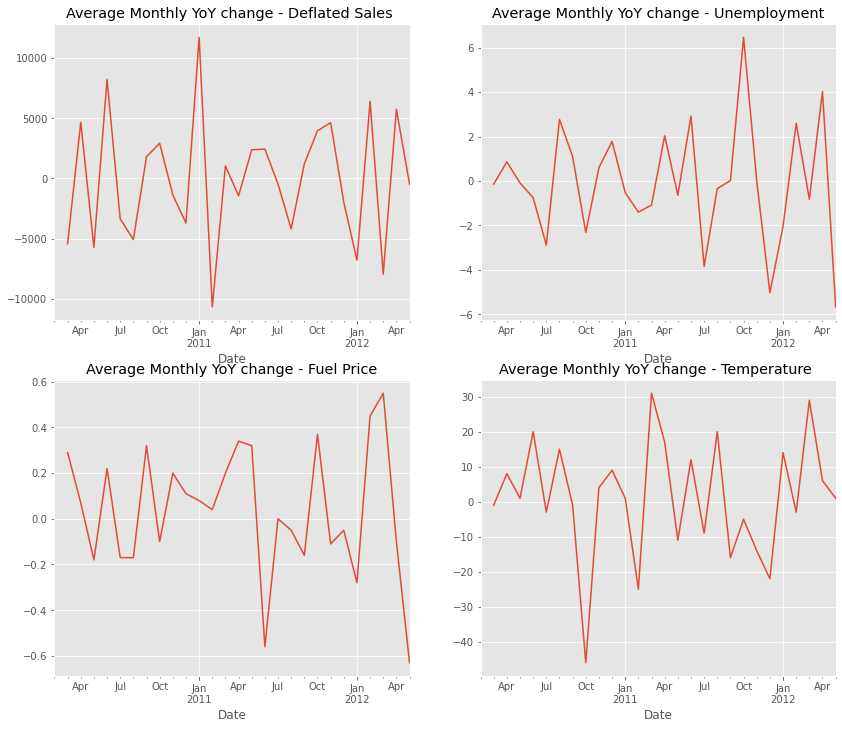

In [10]:
# Year over year changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Temperature ')

Text(0.5, 1.0, 'Average Monthly MoM change - Temperature ')

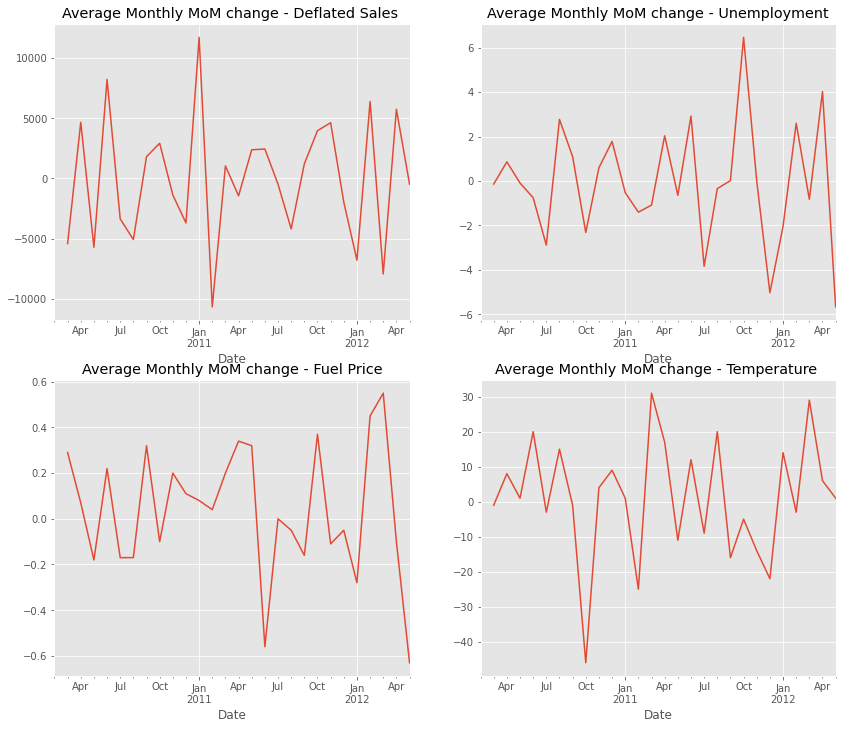

In [11]:
# Month over month changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Temperature ')

In [12]:
### Visualizing Target Lags

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

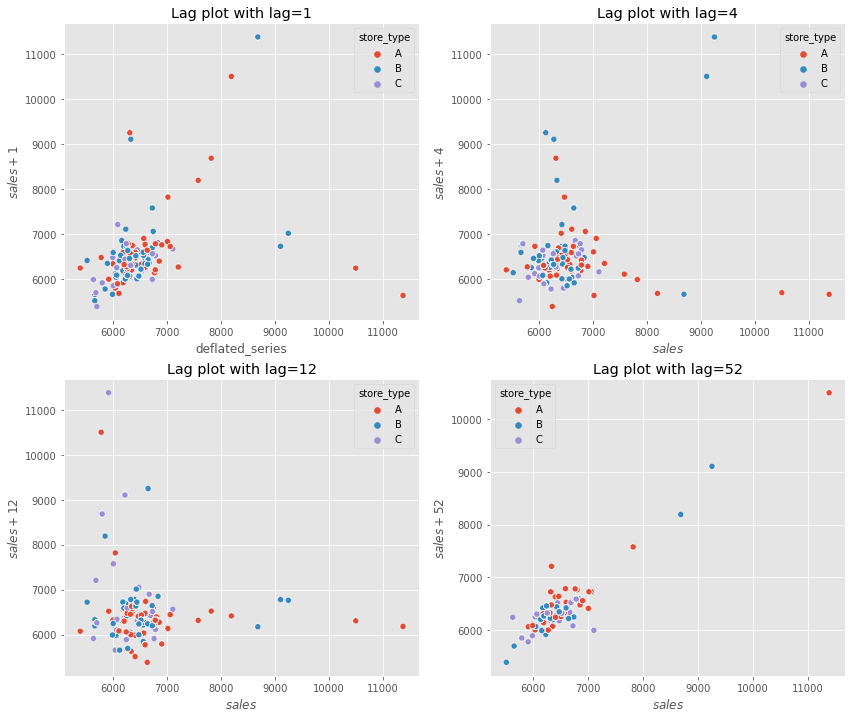

In [13]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-1), hue=X_train.store_type)
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-4), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-12), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('mean'), X_train.groupby('Date').deflated_series.agg('mean').shift(-52), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

In [14]:
a = X_train[X_train.store_type == 'A']
b = X_train[X_train.store_type == 'B']
c = X_train[X_train.store_type == 'C']

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

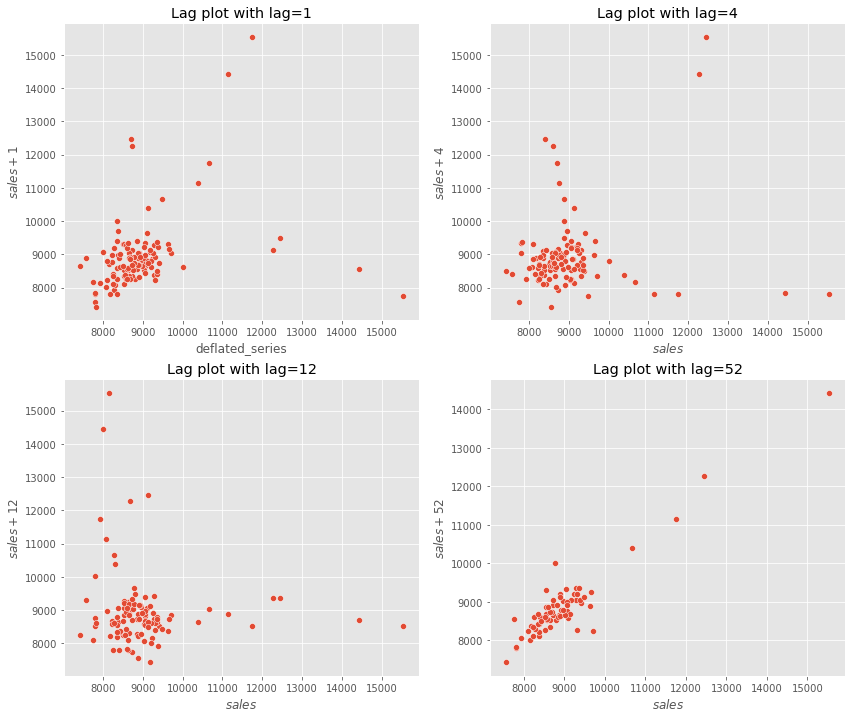

In [15]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

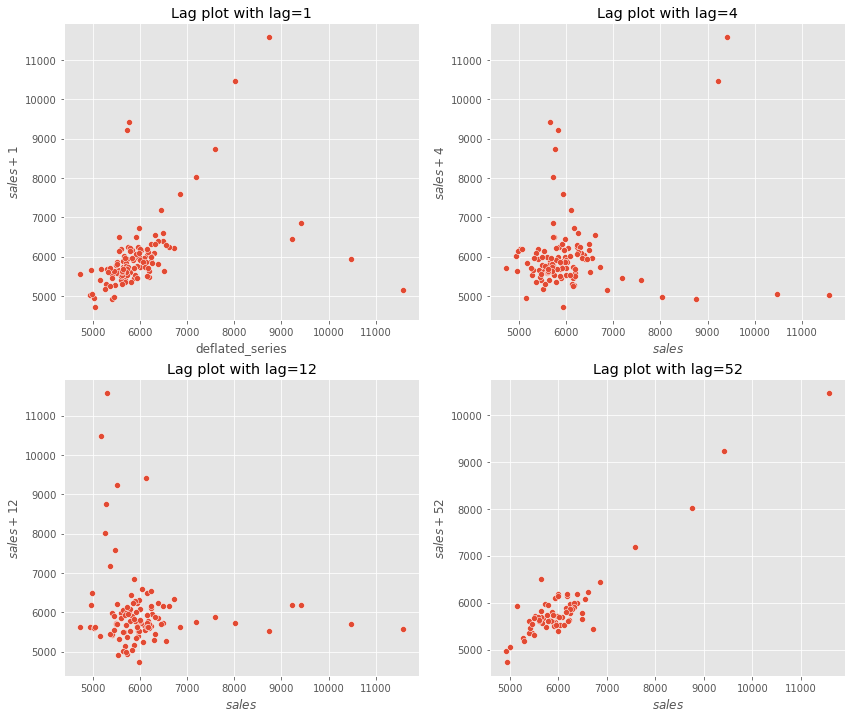

In [16]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

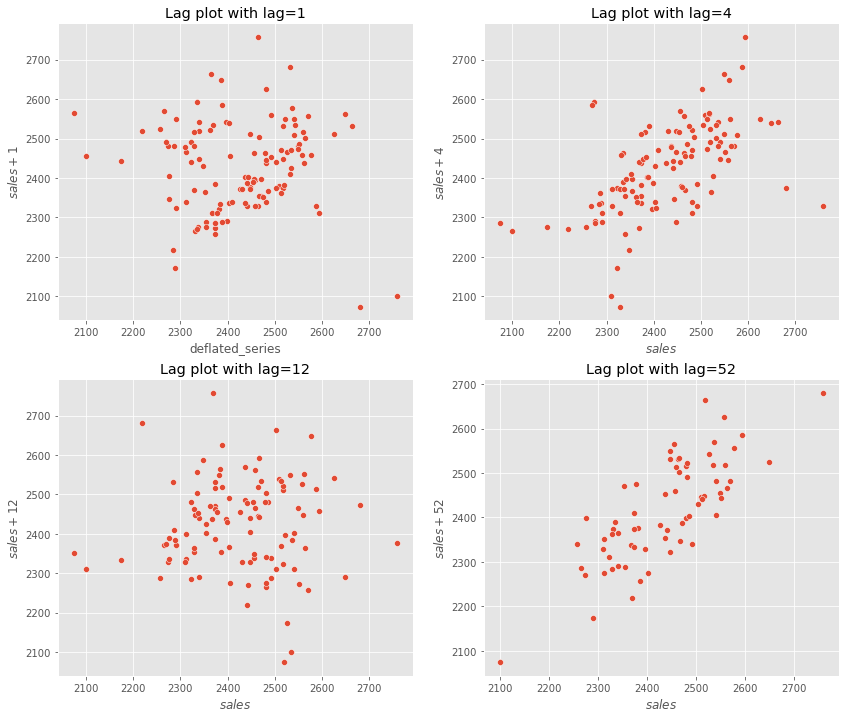

In [17]:
# Various Target Lag plots



plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

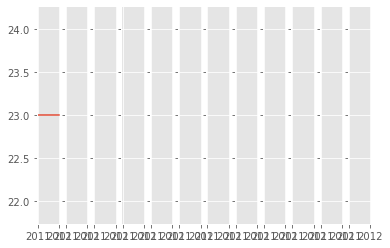

In [18]:
table = X_train.groupby([X_train.index.year, X_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

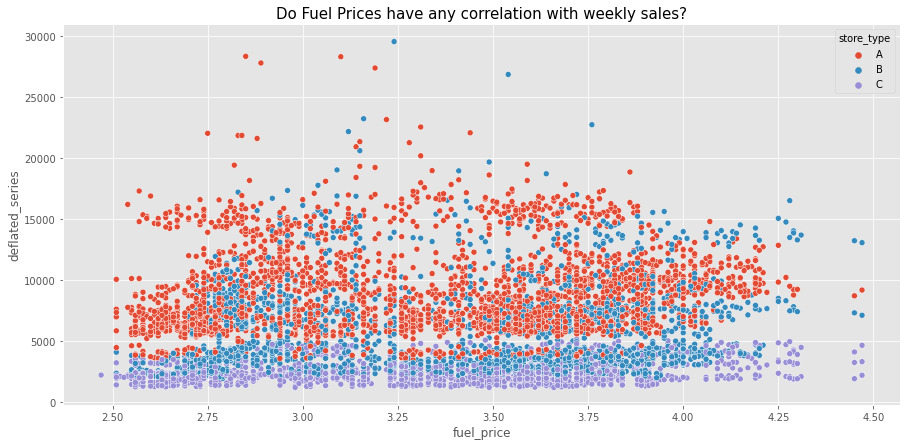

In [19]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, y = 'deflated_series', x = 'fuel_price', hue = 'store_type' )
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

In [27]:
A = a.groupby('Date').mean()
B = b.groupby('Date').mean()
C = c.groupby('Date').mean()

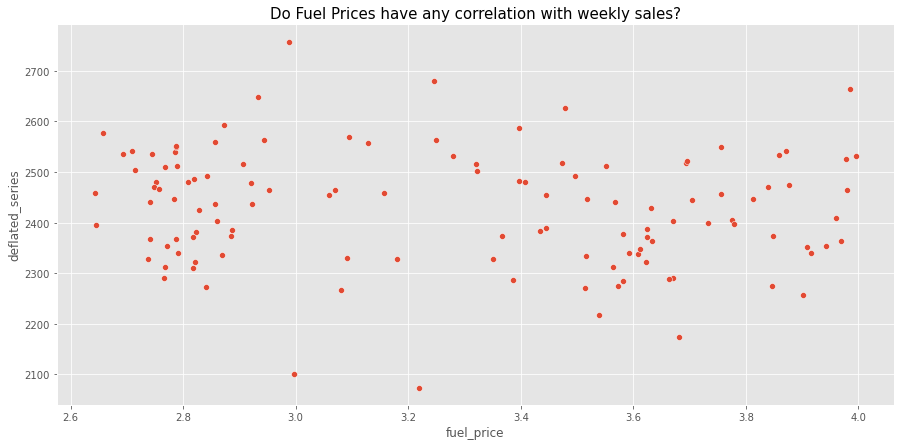

In [29]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = C, y = 'deflated_series', x = 'fuel_price')
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

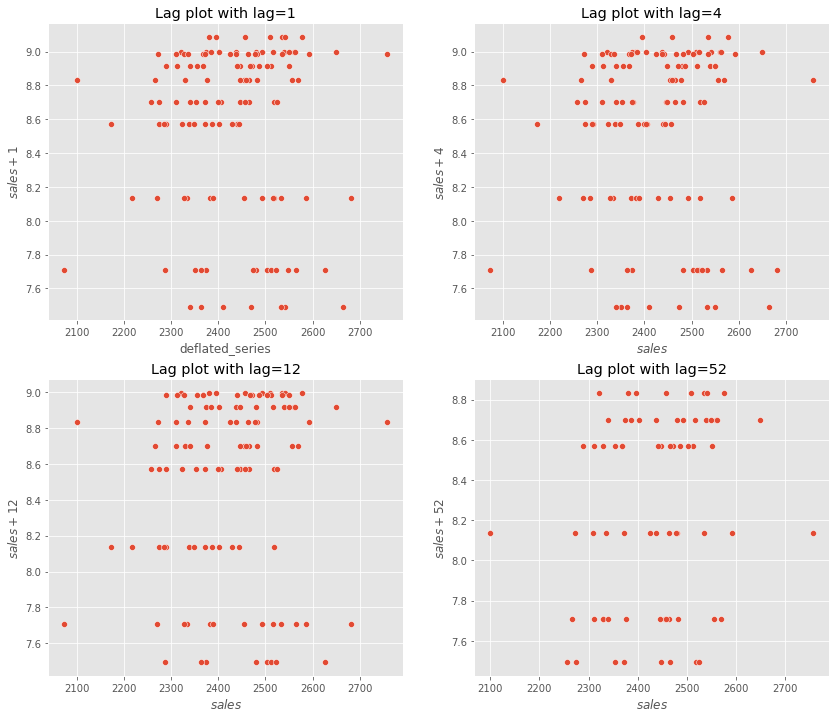

In [31]:

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').unemployment.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').unemployment.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').unemployment.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').unemployment.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')